## Example: KNN for Classification

We'll use the Iris dataset, which is a classic dataset in machine learning. It contains 150 samples of iris flowers, each with four features (sepal length, sepal width, petal length, petal width) and a target variable representing the flower species.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load and Prepare the Data:

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the KNN Model

In [4]:
# Create a KNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Make Predictions and Evaluate the Model:

In [5]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Print the classification report
cr = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Classification Report:\n', cr)

Accuracy: 1.00
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Visualize the Decision Boundary (for 2D)

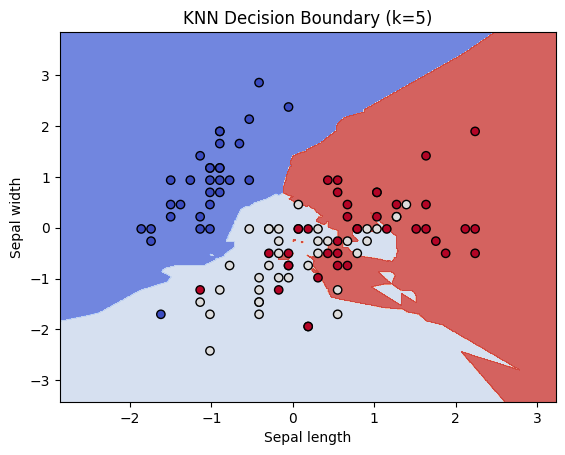

In [6]:
# Reduce the dataset to 2D for visualization (using only the first two features)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_train_2d, y_train)

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the label for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KNN Decision Boundary (k=5)')
plt.show()

This code demonstrates how to implement and evaluate a KNN classifier in Python using the scikit-learn library. It also shows how to visualize the decision boundary for a 2D subset of the Iris dataset. Adjust the parameters and features as needed for your specific use case.